In [1]:
from MicrogridPSO_module import *
from MicrogridPSO_module_flowchart import *
from MicrogridPSO_module_PSO import *
from MicrogridPSO_pareto_animation import *
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
# inspect function
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.isfunction))

# inspect methods
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.ismethod))

# inspect object & methods
# print(dir(MicrogridPSO_initialize))
#print(dir(Make_animation))

In [3]:
# How to initialize
# Class check
# CSVを読み込みインスタンスを作成。
PSO = MicrogridPSO_initialize("Target_input.csv")

# 初期値を設定
PSO.set_initial_input_values({"number_demand": 1,
                              "pv_capacity_per_unit": 245,
                              "wind_capacity_per_unit": 2.3,
                              "SOC_max[%]": 0.8,
                              "SOC_min[%]": 0.2,
                              "SOC_start[%]": 0.5
                              })

# 初期値を設定
PSO.set_initial_cost_parameters({"It_PV_1kW[yen/year]": [726383.3333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_PV_1kW[yen/year]": [4329] * 20,
                                 "Ft_PV_1kW[yen/year]": [0]*20,
                                 "It_Wind_1kW[yen/year]": [302274.7826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_Wind_1kW[yen/year]": [662.785213] * 20,
                                 "Ft_Wind_1kW[yen/year]": [0]*20,
                                 "It_Diesel_1kW[yen/year]": [33611.11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
                                 "Mt_Diesel_1kW[yen/year]": [8.8] * 20,
                                 "Diesel_Pf": 121.8,
                                 "Diesel_Adg": 0.2461,
                                 "Diesel_Bdg": 0.081451,
                                 "It_Battery_1kW[yen/year]": [13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0],
                                 "Mt_Battery_1kW[yen/year]": [1100] * 20,
                                 "Ft_Battery_1kW[yen/year]": [0]*20,
                                 "Sell_income_from_trashed[kWh/yen]": [0]*20,
                                 "r[yen/year]": [0.0234375]*20,
                                 "operation_year": list(range(1, 21))
                                 })

# PSOの中身を確認
# print(dir(PSO))
# print(vars(PSO))
# len(PSO.Target_input.index)

In [4]:
%%time

#計算結果を実行
iterations_PSO(PSO)

Inform the number of iterations: 5
Inform the number of particles: 3
Inform w: 0.7
Inform c1: 0.4
Inform c2: 0.2
{'pv_cap_max': 0, 'wind_cap_max': 0, 'battery_cap_max': 0, 'diesel_max': 0} 
iterations: 5 n_particles: 3 w: 0.7 c1: 0.4 c2: 0.2 particle: {'particle_position_vector': array([[2.80398929e+03, 7.09826848e+01, 6.46279249e+01, 3.97745195e+01],
       [2.99612810e+03, 5.65998378e+01, 4.64848224e+01, 7.91587682e+00],
       [9.61335048e+03, 6.85526902e+01, 8.39095503e+01, 3.99419580e+01]]), 'personal_best_position': array([[2.80398929e+03, 7.09826848e+01, 6.46279249e+01, 3.97745195e+01],
       [2.99612810e+03, 5.65998378e+01, 4.64848224e+01, 7.91587682e+00],
       [9.61335048e+03, 6.85526902e+01, 8.39095503e+01, 3.99419580e+01]]), 'personal_best_fitness_value': array([inf, inf, inf]), 'global_best_fitness_value': inf, 'global_best_position': array([[2.80398929e+03, 7.09826848e+01, 6.46279249e+01, 3.97745195e+01],
       [2.99612810e+03, 5.65998378e+01, 4.64848224e+01, 7.9158768

-----particle_position[ 1 ]  49304167.65443886 [yen].  [2947.42978557   94.787115     18.02057978   53.51976786]
      *previous_velocity_vector[ 1 ] [-123.68615275   -0.64952768   -1.25580958   -1.54713216]
      *new_velocity [-82.26154621  -3.84126923   1.64525571  -5.12732723]
      *particle_position_vector[ 1 ] is updated. particle_position: [2865.16823936   90.94584578   19.66583549   48.39244063]
-----particle_position[ 2 ]  35481001.314319246 [yen].  [8720.20680841   66.25285362   77.96197982   34.09111143]
      *personal best is updated.particle[ 2 ]: [8720.20680841   66.25285362   77.96197982   34.09111143]
      *previous_velocity_vector[ 2 ] [-82.26154621  -3.84126923   1.64525571  -5.12732723]
      *new_velocity [-901.6933043    -4.11238554   -3.49014927   -7.44910098]
      *particle_position_vector[ 2 ] is updated. particle_position: [7818.51350411   62.14046808   74.47183055   26.64201045]
-------iteration = 3 -----------
[[2279.0177802    66.32863291   56.8209994   

In [5]:
# print(PSO.best['gbest_fitness_value'])
df=PSO.best['table']
df.to_csv('Result/PSO_result_no_income.csv',encoding="SHIFT-JIS")  
df

,Check,Diesel_Cf,battery state[%],battery state[kWh],battery_charging_power,battery_discharging_power,demand,diesel power,flowchart_root,hour,pv,pv+wind-demand,trashed power,wind
0,True,0.0,49.791330,23.145411,0.000000,0.097000,0.097000,0.0,0h: discharging 0.097[kWh].,0,0.000000,-0.097000,0,0.000000
0,True,0.0,49.582659,23.048411,0.000000,0.097000,0.097000,0.0,1h: discharging 0.097[kWh].,1,0.000000,-0.097000,0,0.000000
0,True,0.0,49.373989,22.951411,0.000000,0.097000,0.097000,0.0,2h: discharging 0.097[kWh].,2,0.000000,-0.097000,0,0.000000
0,True,0.0,49.165319,22.854411,0.000000,0.097000,0.097000,0.0,3h: discharging 0.097[kWh].,3,0.000000,-0.097000,0,0.000000
0,True,0.0,48.956649,22.757411,0.000000,0.097000,0.097000,0.0,4h: discharging 0.097[kWh].,4,0.000000,-0.097000,0,0.000000
0,True,0.0,48.747978,22.660411,0.000000,0.097000,0.097000,0.0,5h: discharging 0.097[kWh].,5,0.000000,-0.097000,0,0.000000
0,True,0.0,48.539308,22.563411,0.000000,0.097000,0.097000,0.0,6h: discharging 0.097[kWh].,6,0.000000,-0.097000,0,0.000000
0,True,0.0,48.531866,22.559952,0.000000,0.003460,0.208452,0.0,7h: discharging 0.003[kWh].,7,0.027279,-0.003460,0,0.177713
0,True,0.0,49.454626,22.988895,0.428944,0.000000,0.295700,0.0,8h,8,0.358684,0.428944,0,0.365959
0,True,0.0,50.932728,23.675988,0.687093,0.000000,0.255900,0.0,9h,9,0.942993,0.687093,0,0.000000


In [6]:
# plot_list
best_cost_list = np.array(PSO.best_cost_list)
gbest_list = np.array(PSO.global_best_list)
iteration_list = np.array(PSO.iteration_list)
plot_list = pd.DataFrame({'iteration': np.array(PSO.iteration_list)+1,
                          'cost': np.array(PSO.best_cost_list)})

In [7]:
PSO.best["variables"]

{'pv_cap_max': 2996.1281023864317,
 'wind_cap_max': 56.59983782512358,
 'battery_cap_max': 46.48482237130628,
 'battery_max': 37.18785789704503,
 'battery_min': 9.296964474261257,
 'diesel_max': 7.91587681672098,
 'demand_sum': 5230.855261158001,
 'pv_power_sum': 977.5003829455985,
 'wind_power_sum': 4159.116820967727,
 'battery_charging_power_sum': 2295.1582760749857,
 'battery_discharging_power_sum': 2281.212829363593,
 'diesel_power_sum': 108.18350395606721,
 'trashed_power_sum': 0,
 'Diesel_Cf_sum': 7224.125423932382}

In [8]:
plot_list

,iteration,cost
0,1,2.715359e+07
1,2,2.715359e+07
2,3,2.715359e+07
3,4,2.715359e+07
4,5,2.715359e+07


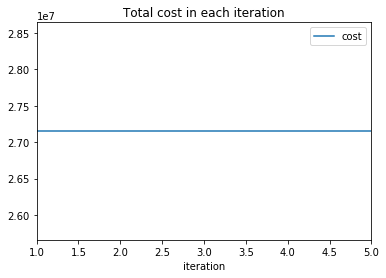

In [9]:
plot_list.plot(x="iteration", y="cost", title='Total cost in each iteration')
plt.savefig('Result/Total cost in each iteration.png')

In [10]:
COST_PV = (PSO.best["variables"]["pv_cap_max"] / 1000) * (np.array(PSO.initial_cost_parameters["It_PV_1kW[yen/year]"]
                                                                   ) + np.array(PSO.initial_cost_parameters["Mt_PV_1kW[yen/year]"]))
COST_Wind = (PSO.best["variables"]["wind_cap_max"]
             * (np.array(PSO.initial_cost_parameters["It_Wind_1kW[yen/year]"]) + np.array(PSO.initial_cost_parameters["Mt_Wind_1kW[yen/year]"])))
COST_Diesel = (PSO.best["variables"]["diesel_max"]
               * (np.array(PSO.initial_cost_parameters["It_Diesel_1kW[yen/year]"]) + np.array(PSO.initial_cost_parameters["Mt_Diesel_1kW[yen/year]"]))) + np.array(PSO.best["variables"]["Diesel_Cf_sum"] * 20)
COST_Battery = PSO.best["variables"]["battery_cap_max"] * (np.array(
    PSO.initial_cost_parameters["It_Battery_1kW[yen/year]"]) + np.array(PSO.initial_cost_parameters["Mt_Battery_1kW[yen/year]"]))

COST = {
    "COST PV": np.round(COST_PV, 2),
    "TOTAL COST PV": np.round(np.sum(COST_PV), 2),
    "LCOE PV": np.round(np.sum(COST_PV)/(20*PSO.best["variables"]["pv_power_sum"]), 2),
    "COST Wind": np.round(COST_Wind, 2),
    "TOTAL COST Wind": np.round(np.sum(COST_Wind), 2),
    "LCOE WIND": np.round(np.sum(COST_Wind)/(20*PSO.best["variables"]["wind_power_sum"]), 2),
    "COST DIESEL": np.round(COST_Diesel, 2),
    "TOTAL COST DIESEL": np.round(np.sum(COST_Diesel), 2),
    "LCOE DIESEL": np.round(np.sum(COST_Diesel)/(20*PSO.best["variables"]["diesel_power_sum"]), 2),
    "COST BATTERY": np.round(COST_Battery, 2),
    "TOTAL COST BATTERY": np.round(np.sum(COST_Battery), 2),
    "LCOE BATTERY": np.round(np.sum(COST_Battery)/(20*PSO.best["variables"]["battery_discharging_power_sum"]), 2),
}

In [11]:
# 計算結果テキストファイルの作成
f = open('Result/PSO_result_parameters.txt', 'w')  # 書き込みモードで開く
f_content = 'LCOE:'+str(np.sum(PSO.best['SCL'])/np.sum(PSO.best['SEL']))+'\nglobal_best_position:'+str(PSO.best['global_best_position'])+'\nglobal_best_fitness_value: '+str(PSO.best['global_best_fitness_value'])+"\nCOST:"+str(COST)+"\nPSO.best[variables]:"\
    + str(PSO.best["variables"]) + '\nPSO.initial_cost_parameters:' + str(
        PSO.initial_cost_parameters)+'\nSCL:'+str(PSO.best['SCL'])+'\nSEL:'+str(PSO.best['SEL'])
f.write(f_content)  # 引数の文字列をファイルに書き込む
f.close()  # ファイルを閉じる

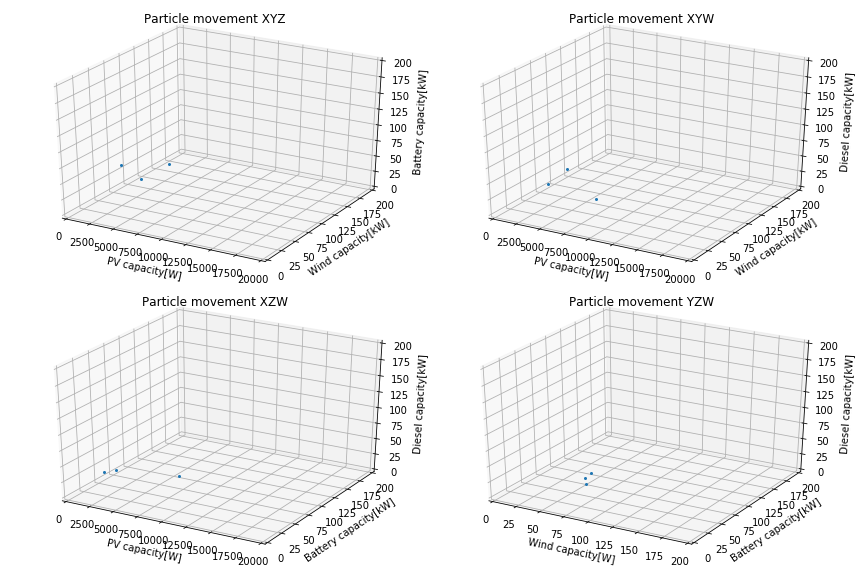

In [12]:
#アニメーションの書き出し
Make_animation("Result/all_particle_data.npy")

In [13]:
PSO.best['SCL']

array([19958889.85898747,   246034.09636136,   246166.0776364 ,
         246169.17264581,   875573.73564222,   246169.24688619,
         246169.24692604,   246169.24692697,   875573.74183448,
         246169.24692699,   246169.24692699,   246169.24692699,
         875573.74183448,   246169.24692699,   246169.24692699,
         246169.24692699,   875573.74183448,   246169.24692699,
         246169.24692699,   246169.24692699])

In [14]:
PSO.best['SEL']

array([7353.66208218, 7521.88164424, 7525.91664404, 7526.01126627,
       7526.01348401, 7526.01353599, 7526.0135372 , 7526.01353723,
       7526.01353723, 7526.01353723, 7526.01353723, 7526.01353723,
       7526.01353723, 7526.01353723, 7526.01353723, 7526.01353723,
       7526.01353723, 7526.01353723, 7526.01353723, 7526.01353723])

In [15]:
dir(PSO)

['Diesel_Cf',
 'Diesel_fc',
 'SCL',
 'SEL',
 'SOC_max',
 'SOC_min',
 'Target_input',
 'Target_input_len',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'all_particle_data',
 'all_particle_data_with_cost',
 'battery_cap_max',
 'battery_charging_power',
 'battery_discharging_power',
 'battery_max',
 'battery_min',
 'battery_need',
 'battery_need_pv',
 'best',
 'best_cost_list',
 'check',
 'df',
 'diesel_max',
 'fitness_variable_parameters',
 'flowchart_parameters',
 'flowchart_root',
 'global_best_fitness_value',
 'global_best_list',
 'global_best_position',
 'h',
 'initial_cost_parameters',
 'initial_input_values',
 'iteration_list',
 'np_PV_efficient',
 'np_Wind_effi